# Расчет количества и теплоперепадов нерегулируемых ступеней ЦВД

## Исходные данные для первого отсека ЦВД

|№|Наименование | Значение|
|-| ------------------------------------------------------------------- | ----------------------------- |
|1|Давление полного торможения после нерегулируемой ступени             | $$\ \bar {p}_0^{(3)} = 0.485 \ МПа$$      |
|2|Энтальпия полного торможения перед первой нерегулируемой ступенью    | $\ \bar h_0^{(3)} = 2867.9 \ кДж/кг$   |
|3|Частота вращения вала                                                | $\ n = 95 \ Гц$               |
|4|Расход пара в группе ступеней                                        | $\ G_0^{(3)} = 47.93\  кг/с$        |
|5|Давление за отсеком                                                  | $\ p_z^{(3)} = 0.25 \ МПа$           |
|6|Внутренний КПД группы ступеней                                       | $\ \eta_{oi}^{(3)} = 0.887 $        |                      

Далее по расчету все переменные, относящиеся к полным параметрам имеют префикс f, например переменная fp_0 означает $\bar p_0$, аналогично и для других параметров

In [1]:
# Используемые для расчета библиотеки

# out3, row 14734, green

# Для динамического вывода значений
from IPython.display import Math

# Для использования единиц измерения
from pint import Quantity as Q
import pint

# Для расчета термодинамических параметров
import API

# Для математических расчетов
import numpy as np

# Для построения графиков
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

API loaded


In [2]:
# Объявление начальных переменных

# Давление полного торможения перед группой ступеней
fp_0        = Q(0.485, "MPa")

# Энтальпия полного торможения перед группой ступеней
fh_0        = Q(2867.9, "kJ/kg")

# Термодинамическая точка f0
fPoint_0    = API.ThPoint(p=fp_0, h=fh_0)

# Номинальная частота вращения вала
n           = Q(95, "1/s")

# Массовый расход через группу ступеней
G_0         = Q(47.93, "kg/s")

# Давление за группой ступеней
p_z         = Q(0.25, "MPa")

# Внутренний относительный КПД группы ступеней
etaHPC_oi   = Q(0.887, "")

## Варируемые величины

|№      | Наименование                                                          | Обозначение                               |
| ----- | --------------------------------------------------------------------- | ----------------------------------------- |
|1      |Степень реактивности первой нерегулируемой ступени в корне             | $$\ \rho_{к}^{(3)} = 0.03-0.07=0.03$$       |
|2      |Эффективный угол выхода потока из сопловой решетки                     | $\ \alpha_{1эф}^{(3)} = 8-16\ ^\circ$     |
|3      |Коэффициент скорости сопловой решетки                                  | $\ \varphi^{(3)} = 0.93-0.96=0.945$        |
|4      |Коэффициент расхода сопловой решетки первой нерегулируемой ступени     | $\ \mu^{(3)} = 0.95-0.97=0.96$            |
|5      |Перекрыша между высотами лопаток первой нерегулируемой ступени         | $\ \Delta^{(3)} = 0.003 \ м$              |


In [3]:
# Объявление варируемых переменных

# Степень реактивности первой нерегулируемой ступени в корне
rho_k       = Q(0.07, "")

# Эффективный угол выхода потока из сопловой решетки
alpha_1eef  = Q(10, "deg")

# Коэффициент скорости сопловой решетки
phi         = Q(np.mean([0.93, 0.96]), "")

# Коэффициент расхода сопловой решетки первой нерегулируемой ступени
mu          = Q(np.mean([0.95,0.97]), "")

# Перекрыша между высотами лопаток первой нерегулируемой ступени 
Delta       = Q(0.003, "m")

# Предполагаемое количество ступеней
Z           = Q(2, '')

## Алгоритм расчета
### 1. Задаемся средним диаметром первой нерегулируемой ступени 

In [4]:
# Средний диаметр первой нерегулируемой ступени
d_1 = Q(0.755, "m")

### 2. Определяем энтропию пара за первой нерегулируемой ступенью

In [5]:
fs_0 = fPoint_0.s()

Math(r"\Large 2.\ \bar {s}_{0}^{(1)} = " + r"f(p={fp_0}, h={fh_0}) = {fs_0:~}".format(fp_0 = fp_0.m, fh_0 = fh_0.m, fs_0 = round(fs_0, 3)))

<IPython.core.display.Math object>

### 3. Определяем высоту первой нерегулируемой ступени
Для этого задаемся величиной обратной верености $\theta = var$ и проводим итерационный расчет, в результате которого заданная и расчетная обратная веерность должна совпадать не менее чем на 0.1%, так же проверяем длину лопатки первой нерегулируемой ступени.

1. Задаем величину обратной веерности

    $$\large{\theta = var}$$

2. Определяем степень реактивности на среднем диаметр 

    $$\large{\rho = \rho_{к} + \dfrac{1.8}{\theta + 1.8}}$$

3. Определяем располагаемый теплопеперад по параметрам торможения при оптимальном для первой ступени 

    $$\large{ \Bigg(\dfrac{u}{c_ф} \Bigg)_{опт} = \dfrac{\varphi \cdot \cos{\alpha_{1эф}}}{2 \sqrt{1-\rho}}}$$

4. Определяем располагаемый теплопеперад по параметрам торможения при оптимальном $\large \Big(\dfrac{u}{c_ф} \Big)_{опт}$ с помощью зависимости: 

    $$\large{\bar {H}_{01} = 12300\Bigg( \dfrac{ d_1}{ \Bigg(\dfrac{u}{c_ф}\Bigg)_{опт}}\dfrac{n}{50} \Bigg)^2}$$
    
5. Определяем теоретическое значение энтальпии за первой ступенью 

    $$\large{h_{2t} = \bar {h}_{0} - \bar H_{01}}$$

6. Определяем удальный объем пара за первой нерегулируемой ступенью при изоэнтропном процессе расширения по свойствам воды и водяного пара 
    
    $$\large{v_{2t} = f(h_{2t}, \bar s_0)}$$

7. Определяем высоту лопаток первой нерегулируемой ступени

    $$ l_{11} = \dfrac{G_0 v_{2t} \big(u/c_{ф}\big)_{опт}}{\pi^2  d_1^2  n  \sqrt{1-\rho}\ \mu_1 \sin{\alpha_{1эф}}  }$$

В расчете так же надо учесть тот факт, что изначально задаваемое количество ступеней влияет на конечный результат.

In [6]:
# 3.1. Величина обратной веерности
theta = 20
iterations_number = 0
percent_difference = 0.0
l_11 = 0
while (True):
    
    # 3.2. Определяем степень реактивности на среднем диаметре
    rho = rho_k + 1.8/(theta+1.8)
    
    # 3.3. Определяем оптимальное значение u/c_f
    uDIVu_cf = phi*np.cos(alpha_1eef)/(2*np.sqrt(1-rho))
    
    # 3.4. Определяем располагаемый теплопеперад по параметрам торможения при оптимальном
    # u/c_f для первой ступени 
    fH_01 = 12300 * np.power((d_1 * n)/(uDIVu_cf * 50), 2)
    fH_01.ito('kJ/kg')
    
    # 3.5. Определяем теоретическое значение энтальпии за первой ступенью
    h_2t = fh_0 - fH_01
    
    # 3.6. Определяем удальный объем пара за первой нерегулируемой ступенью при
    # изоэнтропном процессе расширения по свойствам воды и водяного пара
    Point_2t = API.TCPv2.ThPoint(h=h_2t, s=fPoint_0.s())
    v_2t = Point_2t.v()
    
    # 3.7. Определеяем высоту первой нерегулируемой ступени
    l_11 = (G_0 * v_2t * uDIVu_cf)/(np.power(np.pi*d_1,2) * n * np.sqrt(1-rho) * np.sin(alpha_1eef) * mu)
    l_11.ito("m")
    # 3.8. Определяем окончательное значение обратной веерности и проверяем его
    
    # Проверка условия 
    # Если получившаяся величина больше, чем заданная
    if (d_1/l_11 > theta):
        # То вычитаем отношение из единицы
        percent_difference = (1 - theta/(d_1/l_11)) 
    # Если величина меньше, чем заданная
    else:
        # То вычитаем из отношения единицу
        percent_difference = (theta/(d_1/l_11) - 1)
    
    # Если условие выполнилось - выходим из цикла
    if (np.abs(percent_difference) < 0.01):
        break
    # Иначе добавляем итерацию и меняем приближающее значение на найденное в процессе цикла
    else:
        iterations_number += 1
        theta = (d_1/l_11)


In [7]:
# Далее идет класс для вывода в LaTeX'е

class lstr(str):
    
    # классическая версия str.format с изменением замены {} на [] и без поддержки [1] [2]
    def format(self, *args, **kwargs):
        
        for i in args:
            self = self.replace("[]", lstr(i), 1)
        
        for i in kwargs.items():
            self = self.replace(lstr('[' + i[0] + ']'), lstr(i[1]))
        
        return lstr(self)
    
    
    
    def __correct_round(self, value, ALIGN_MODE = 0):
        '''
            Правильное округление величин, достаточное для инженерных расчетов:
            
            # if ==0,1 : 0.0044, .0044 -> 0.004
            # if ==2: 12.3313123 -> 12.33
            # if >=3: 343.131233 -> 343.1, 34141414.54 ->34141414.5
            # if 0,1 : 0.00, .0
            
        '''    
        
        dot_pos = lstr(value).find(".")
        
                
            
        if ((dot_pos == 0) or (dot_pos == 1)):
            # Если включен режим округления для ровного вырванивния
            # Так как число может начинаться с любого количества нулей, а нам нужно только последние три цифры после, то
                # необходимо найти координаты начала этих значимых цифр
            last_null_pos = 0
            
                # ищем
            for i in lstr(value)[dot_pos + 1:]:
                if (i != '0'):
                    break
                else:
                    last_null_pos += 1
            
            if (ALIGN_MODE):
                if (len(str(value)) < 2 + last_null_pos+3):
                    return str(value)
            
                # округляем до позиции первой цифры и еще две цифры сверху (в сумме 3)
                out_value = round(value, last_null_pos+3)
            
                # Если число округляется так, что значащих цифр станвится 2 (и еще ноль, который не отрисовывается), то 
                # добавляем его для ровной отрисовки далее
                # 0.000010999 -> 0.0000110 а не 0.000011
            
                # литералы ниже: 2-это "0." в начале числа, 3-это последние значащие цифры
                if len(str(out_value)) != 2 + last_null_pos+3:
                    return str(out_value) + '0'
                else:
                    return str(out_value)
            # режим выравнивания выключен
            else:
                return round(value, last_null_pos+3)
            
        elif (dot_pos == 2):
            if (ALIGN_MODE):
                out_value = round(value, 2)
            
                # Если число не состоит из двух первых знаков, запятой и двух последующих, то добавляем ноль для ровной отрисовки
                # 14.0999 -> 14.10 а не 14.1
            
                # литералы ниже: 2 - первые два знака до запятой, 1 - точка между целыми и дробными, 2 - два знака после запятой
                if len(str(out_value)) != 2 + 1 + 2:
                    return str(out_value) + '0'
                else:
                    return str(out_value)
            else:
                return round(value,2)
            
        elif (dot_pos >= 3):
            if (ALIGN_MODE):
                out_value = round(value, 1)
            
                # Если большое число округлилось в большую сторону, то добавляем ноль для правильной отрисовки далее
                # 19999.9999 -> 20000.0 а не 20000
            
                # если длина строки меньше, чем была бы с знаком после точки
                if len(str(out_value)) <= dot_pos+1:
                    return str(out_value) + '0'
                else:
                    return str(out_value)
            else:
                return round(value,1)
        else:
            return value
    
    def dlformat(self, *args, **kwargs):
        '''
            Версия lstr.format(...) с поддержкой единиц измерения с использоваением округления
        '''
        
        _args = list()
        for i in args: 
            if (isinstance(i, pint.Quantity)):
                _args.append(self.__correct_round(i.m, ALIGN_MODE=1))
            else:
                _args.append(i)
                
        _kwargs = list()
        for i in kwargs.items():
            if (isinstance(i[1], pint.Quantity)):
                _kwargs.append((i[0], self.__correct_round(i[1].m, ALIGN_MODE=1)))
            else:
                _kwargs.append((i[0], i[1]))  
                
        return self.format(*tuple(_args), **dict(_kwargs))
    
    def dformat(self, *args, **kwargs):
        '''
            Версия lstr.format(...) с поддержкой единиц измерения с использоваением округления
        '''
        
        _args = list()
        for i in args: 
            if (isinstance(i, pint.Quantity)):
                _args.append(self.__correct_round(i.m, ALIGN_MODE=0))
            else:
                _args.append(i)
                
        _kwargs = list()
        for i in kwargs.items():
            if (isinstance(i[1], pint.Quantity)):
                _kwargs.append((i[0], self.__correct_round(i[1].m, ALIGN_MODE=0)))
            else:
                _kwargs.append((i[0], i[1]))  
                
        return self.format(*tuple(_args), **dict(_kwargs))
    
    def get_large(self):
        local_lstr = self
        local_lstr = lstr(r"\Large{") + local_lstr + lstr(r"} \\ \ \\")
        return local_lstr


a = lstr("[][][b][c]")

#print(a.format(1,2,b=" 13",c=" vd"))

#print("{}{}{b}".format("AAA", "b", b="3"))
#swap_br_in_math_string("3213123", a=10, b=20)
#Math(lstr("\Delta [H_0] = [H_0v]\ кДж/кг").format(H_0="H_0",H_0v=33))
f = Q(0.0330031, "kJ/kg")
b = Q(22.0993213123, "meter")
d = Q(3131313.9992999, "kg")
print(lstr("[d] [b] [c]").dlformat(d=f,b=b,c=d))

#print(type(lstr(r"3.2 \ \theta = []").dformat(theta)))

0.0330 22.10 3131314.0


In [8]:
Math(
    # 3.2. theta
    lstr(r"3.2.\ \theta = []").dformat(theta).get_large() +
    
    # 3.3. rho
    lstr(r"3.3.\ \rho = \rho_{к} + \dfrac{1.8}{\theta + 1.8} = [rho_k] + \dfrac{1.8}{[theta] + 1.8} = [rho]").dformat(rho_k = rho_k, theta = theta, rho=rho).get_large() +
    
    # 3.4. fH_01 = 12.3 * np.power((d_1 * n)/(uDIVu_cf * 50), 2)
    lstr(r"3.4.\ \bar H_{01}=12300 \Bigg( \dfrac{d_1}{(u/c)_{опт}} \dfrac{n}{50} \Bigg)^2 = 12300 \Bigg( \dfrac{[d_1]}{[uDIVc]} \dfrac{[n]}{50} \Bigg)^2 = [fH_01] \ кДж/кг").dformat(d_1=d_1, uDIVc=uDIVu_cf, n=n,fH_01=fH_01.to("kJ/kg")).get_large() +
    
    # 3.5. h_2t = fh_0 - fH_01
    lstr(r"3.5.\ h_{2t} = \bar h_0 - \bar H_{01} = [fh_0] - [fH_01] = [h_2t]\ кДж/кг").dformat(fh_0=fh_0, fH_01=fH_01, h_2t=h_2t).get_large() +
    
    # 3.6. v_2t = Point_2t.v() /  Point_2t = API.TCPv2.ThPoint(h=h_2t, s=fPoint_0.s())
    lstr(r"3.6.\ v_{2t} = f\Bigg(\begin{matrix}h_{2t} = [h_2t] \\ \bar s_0 = [fs_0]\end{matrix}\Bigg)  = [v_2t]\ м^3/кг").dformat(h_2t=h_2t,fs_0=fs_0,v_2t=v_2t).get_large() + 
    
    # 3.7. l_11 = (G_0 * v_2t * uDIVu_cf)/(np.power(np.pi*d_1,2) * n * np.sqrt(1-rho) * np.sin(alpha_1eef) * mu)
    lstr(r"3.7.\ l_{11} = \dfrac{G_0\ v_{2t} \ (u/c_ф)_{опт} }{\pi^2 \ d_1^2\ n\ \sqrt{1-\rho}\ \mu \ \sin{\alpha_{1эф}}} = \dfrac{[G_0]\cdot [v_2t]\cdot [uDIVc]}{\pi^2\cdot [d_1]^2\cdot [n]\ \sqrt{1-[rho]}\cdot [mu]\cdot \sin{[alpha_1eef]^\circ}} = [l_11]\ м").dformat(G_0=G_0, v_2t=v_2t, uDIVc=uDIVu_cf,d_1=d_1,n=n,rho=rho,mu=mu,alpha_1eef=alpha_1eef, l_11=l_11).get_large()+
    
    lstr(r"3.8.\ При\ расчете\ высоте\ лопатки\ и\ определения\ веерности\ проделано\ [] \ итерации\ и\ погрешность\ составляет\ [] \%").dformat(iterations_number, percent_difference * 100)
)

<IPython.core.display.Math object>

### 4. Определение высоту рабочей лопатки первой нерегулирумой ступени

In [9]:
# Высота рабочей лопатки
l_21 = l_11 + Delta
l_21.ito('m')

In [10]:
Math(
    lstr(r"4.\ l_{21} = l_{11} + \Delta = [l_11] + [Delta] = [l_21]\ м").dformat(l_11=l_11,Delta=Delta,l_21=l_21).get_large()
)

<IPython.core.display.Math object>

### 5. Определение корневого диаметра ступени

In [11]:
# Корневой диаметр ступени
d_k = d_1 - l_21
d_k.ito('m')

In [12]:
Math(
    lstr(r"5.\ d_к = d_1 - l_{21} = [d_1] - [l_21] = [d_k]\ м").dformat(d_1=d_1,l_21=l_21,d_k=d_k).get_large()
)

<IPython.core.display.Math object>

### 6. Определение параметров пара за последней ступенью группы

1. Значение энтальпии пара при изоэнтропном расширении пара в ЦВД

    $$\large{h_{zt} = f\bigg(\begin{matrix}p_z \\ \bar s_0 \end{matrix}\bigg)}$$

2. Теоретический перепад на отсек нерегулируемых ступеней группы

    $$\large{\bar H_0 = \bar h_0 - h_{zt}}$$

3. Действительный теплоперепад на отсек нерегулирумых ступеней группы

    $$\large{H_i = \bar H_0 \cdot \eta_{oi}^{(1)}}$$

4. Действительное значение энтальпии за последней ступенью группы

    $$\large{h_z = \bar h_0 - H_i}$$

5. Действительный объем за последней ступенью группы

    $$\large{v_{2z} = f\bigg(\begin{matrix}p_z \\ h_z \end{matrix}\bigg)}$$

In [13]:
# 6.1. Значение энтальпии пара при изоэнтропном расширении пара в ЦВД:
# Термодинамическая точка zt
Point_zt = API.TCPv2.ThPoint(p=p_z, s=fPoint_0.s())
# Энтальпия
h_zt = Point_zt.h()

# 6.2. Теоретический перепад на отсек нерегулируемых ступеней ЦВД:
fH_0 = fh_0 - h_zt

# 6.3. Действительный теплоперепад на отсек нерегулируемых ступеней ЦВД
H_i = fH_0 * etaHPC_oi

# 6.4. Действительное значение энтальпии за ЦВД (за последней ступенью)
h_z = fh_0 - H_i

# 6.5 Действительный объем за ЦВД (за последней ступенью)
# Термодинамическая точка 2z
Point_2z = API.TCPv2.ThPoint(p=p_z, h=h_z)
v_2z = Point_2z.v()

In [14]:
Math(
    # 6.1
    lstr(r"6.1.\ h_{zt} = f\bigg(\begin{matrix}p_z=[p_z] \\ \bar s_0=[fs_0] \end{matrix}\bigg) = [h_zt]\ кДж/кг").dformat(p_z=p_z,fs_0=fs_0,h_zt=h_zt).get_large() +
    # 6.2
    lstr(r"6.2.\ \bar H_0 = \bar h_0 - h_{zt} = [fh_0] - [h_zt] = [fH_0]\ кДж/кг").dformat(fh_0=fh_0,h_zt=h_zt,fH_0=fH_0).get_large() +
    # 6.3
    lstr(r"6.3.\ H_i = \bar H_0 \cdot \eta_{oi}^{(1)} = [fH_0] \cdot [eta] = [H_i]\ кДж/кг").dformat(fH_0=fH_0,eta=etaHPC_oi,H_i=H_i).get_large() +
    # 6.4
    lstr(r"6.4.\ h_z = \bar h_0 - H_i = [fh_0] - [H_i] = [h_z]\ кДж/кг").dformat(fh_0=fh_0,H_i=H_i,h_z=h_z).get_large() +
    # 6.5
    lstr(r"6.5.\ v_{2z} = f\bigg(\begin{matrix}p_z=[p_z] \\ h_z=[h_z] \end{matrix}\bigg)=[v_2z]\ м^3/кг").dformat(p_z=p_z,h_z=h_z,v_2z=v_2z).get_large()
)

<IPython.core.display.Math object>

### 7. Определение высоты рабочей лопатки последней ступени
Так как объем при высоких давлениях изменяются практически линейно, то можно принять закон изменения диаметров/высот лопаток линейным. Для начала необходимо найти высоту лопатки последней ступени в группе из уравнения:

$$ l_{2z}^2 + l_{2z} \ d_к = l_{21} \ d_{21} \dfrac{v_{2z}}{v_{2t}}$$

$$ l_{2z} = \dfrac{-d_к \pm \sqrt{d_к^2 + 4 l_{21}\ d_{21} \dfrac{v_{2z}}{v_{2t}}}}{2}$$ 

In [15]:
# 7 Высота рабочей лопатки последней ступени
l_2z = (-d_k + np.sqrt(d_k**2 + 4*l_21*d_1*v_2z/v_2t))/2

In [16]:
Math(
    lstr(r"l_{2z} = \dfrac{-d_к + \sqrt{d_к^2 + 4 l_{21}\ d_{21} \dfrac{v_{2z}}{v_{2t}}}}{2} = \dfrac{-[d_k] + \sqrt{[d_k]^2 + 4 \cdot [l_21] \cdot [d_21] \dfrac{[v_2z]}{[v_2t]}}}{2} = [l_2z]\ м").dformat(d_k=d_k,l_21=l_21,d_21=d_1,v_2z=v_2z,v_2t=v_2t,l_2z=l_2z).get_large()
)

<IPython.core.display.Math object>

### 8. Определение среднего диаметра последней ступени группы

$$ \large{d_{2z} = d_к + l_{2z}} $$ 

In [17]:
# 8 Средний диаметр последней ступени группы
d_2z = d_k + l_2z

In [18]:
Math(
    lstr(r"d_{2z} = d_к + l_{2z} = [d_k] + [l_2z] = [d_2z]\ м").dformat(d_k=d_k,l_2z=l_2z,d_2z=d_2z).get_large()
)

<IPython.core.display.Math object>

### 9. Определяем основные параметры первой и последней ступени
1. Определение обратной вверности в первой и последней ступени группы

    $$ \theta_1 = \dfrac{l_{21} + d_к }{l_21} $$ 
    $$ \theta_z = \dfrac{l_{2z} + d_к }{l_2z} $$

2. Определение степени реактивности на среднем диаметре в первой и последней ступени группы

    $$ \rho_1 = \rho_к + \dfrac{1.8}{\theta_1 + 1.8} $$ 
    $$ \rho_z = \rho_к + \dfrac{1.8}{\theta_z + 1.8} $$

3. Определение оптимального значения $u/c_ф$

    $$ \bigg(\dfrac{u}{c_ф}\bigg)_1 = \dfrac{\varphi \cos{\alpha_{1эф}}}{2\sqrt{1-\rho_1}}$$
    $$ \bigg(\dfrac{u}{c_ф}\bigg)_z = \dfrac{\varphi \cos{\alpha_{1эф}}}{2\sqrt{1-\rho_z}}$$

In [19]:
# 9.1 Обратная вверность в первой и последней ступени
theta_1 = (l_21 + d_k)/l_21
theta_z = (l_2z + d_k)/l_2z

# 9.2 Степень реактивности в первой и последней ступени
rho_1 = rho_k + 1.8/(theta_1 + 1.8)
rho_z = rho_k + 1.8/(theta_z + 1.8)

# 9.3 Оптимальное значение u/c_ф
uDIVu_1 = phi*np.cos(alpha_1eef)/(2*np.sqrt(1-rho_1))
uDIVu_z = phi*np.cos(alpha_1eef)/(2*np.sqrt(1-rho_z))

In [20]:
Math(
    lstr(r"9.1.1\ \theta_1 = \dfrac{l_{21} + d_к }{l_21} = \dfrac{[l_21] + [d_k]}{[l_21]} = [theta_1]").dformat(l_21=l_21,d_k=d_k,theta_1=theta_1).get_large() +
    lstr(r"9.1.1\ \theta_z = \dfrac{l_{2z} + d_к }{l_2z} = \dfrac{[l_2z] + [d_k]}{[l_2z]} = [theta_z]").dformat(l_2z=l_21,d_k=d_k,theta_z=theta_z).get_large() + 
    
    lstr(r"\\ \  \\") + 
    
    lstr(r"9.2.1\ \rho_1 = \rho_к + \dfrac{1.8}{\theta_1 + 1.8} = [rho_k] + \dfrac{1.8}{[theta_1] + 1.8} = [rho_1]").dformat(rho_k=rho_k, theta_1=theta_1,rho_1=rho_1).get_large() +
    lstr(r"9.2.2\ \rho_z = \rho_к + \dfrac{1.8}{\theta_z + 1.8} = [rho_k] + \dfrac{1.8}{[theta_z] + 1.8} = [rho_z]").dformat(rho_k=rho_k, theta_z=theta_z,rho_z=rho_z).get_large() + 
    
    lstr(r"\\ \  \\") + 
    
    lstr(r"9.3.1\ \Bigg(\dfrac{u}{c_ф}\Bigg)_1 = \dfrac{\varphi \cos{\alpha_{1эф}}}{2\sqrt{1-\rho_1}} = \dfrac{[phi] \cdot \cos{[alpha_1eef]^\circ}}{2\sqrt{1-[rho_1]}} = [uDIVc]").dformat(phi=phi,alpha_1eef=alpha_1eef,rho_1=rho_1, uDIVc=uDIVu_1).get_large() +
    lstr(r"9.3.2\ \Bigg(\dfrac{u}{c_ф}\Bigg)_z = \dfrac{\varphi \cos{\alpha_{1эф}}}{2\sqrt{1-\rho_z}} = \dfrac{[phi] \cdot \cos{[alpha_1eef]^\circ}}{2\sqrt{1-[rho_z]}} = [uDIVc]").dformat(phi=phi,alpha_1eef=alpha_1eef,rho_z=rho_z, uDIVc=uDIVu_z).get_large()
    
)

<IPython.core.display.Math object>

### 10. Выполнение разбивки теплоперепадов

1. Предполагаем, что средний диаметр ступеней и высота лопаток высота лопаток изменяются вдоль ЦВД линейно. Так же учтем, что удобнее использовать нумерацию для ступеней с 1, поэтому:
    1. Для диаметров:
        $$ \large{d(z_i) = \bigg(\dfrac{d_z-d_1}{Z-1}\bigg)z_i + \dfrac{d_1Z - d_{2z}}{Z-1}}$$
    2. Для высот лопаток: 
        $$ \large{l(z_i) = \bigg(\dfrac{l_z-l_{21}}{Z-1}\bigg)z_i + \dfrac{l_{21}Z-l_{2z}}{Z_1}}$$
2. Определяем обратную веерность для каждой ступени
    $$ \large{\theta_i = \dfrac{l_i + d_к}{l_i}}$$
3. Определяем степень реактивности на среднем диаметре для каждой ступени
    $$ \large{\rho_i = \rho_к + \dfrac{1.8}{\theta_i + 1.8}}$$
4. Для каждой ступени определяем опимальную величину $u/c_ф$
    $$ \large{\bigg( \dfrac{u}{c_ф}\bigg)_{оптi} = \dfrac{\varphi \cos{\alpha_{1эф}}}{2\sqrt{1-\rho_i}}}$$
5. Для каждой ступени определяем теплоперепад по статическим параметрам
    $$ \large{H_{0i} = 12300 \Bigg(\dfrac{d_i}{(u/c_ф)_{оптi}} \dfrac{n}{50}\Bigg)^2K_i}$$
    $$ при \ i>1 \dashrightarrow K_i = 0.95 $$
    $$ при \ i=1 \dashrightarrow K_i = 1.00 $$
    
6. Определяем среднее арифметическое значение теплоперепадов
    $$ \large{H_{0ср} = \dfrac{1}{Z}\displaystyle\sum_{i=1}^ZH_{0i}} $$
7. Определяем коэффициент возврата теплоты
    $$ \large{q_t = 4.8\cdot10^{-4}(1-\eta^{(3)}_{oi})\bar H_0\dfrac{Z-1}{Z}} $$ 
8. Новое значение количества ступеней ЦВД
    $$ \large{Z_{нов}=(1+q_t) \dfrac{\bar H_0}{H_{0ср}}}$$


In [21]:
## 10.1.1, 10.1.2
# Коэффициент k для функции диаметра
k_d = (d_2z - d_1)/(Z.m-1)
b_d = (d_1*Z.m - d_2z)/(Z.m-1)

# Коэффициент k для функции длины лопатки
k_l = (l_2z - l_21)/(Z.m-1)
b_l = (l_21*Z.m - l_2z)/(Z.m-1)

# Функция для определения диаметра по номеру ступени
def d(z_i):
    return k_d*z_i + b_d

# Функция для определения длины лопатки по номеру ступени
def l(z_i):
    return k_l*z_i + b_l

# Перечислим номера ступеней в данном векторе
stages_number_vec = np.arange(1, Z.m+1, 1)

# Диаметры каждой ступени
d_vec = d(stages_number_vec)

# Длины сопловых лопаток каждой ступени
l_vec = l(stages_number_vec)


In [22]:
d_vec_str = lstr(r"\begin{matrix}")
for i in range(0, len(d_vec)):
    d_vec_str += lstr(r"d_{[it]} = k_d z_{[it]} + b_d = [k_d] \cdot [z] + [b_d] = [d_i]\ м ").dlformat(it=i+1,z=i+1,d_i=d_vec[i],k_d=k_d,b_d=b_d)
    d_vec_str += lstr(r"&|\ \ \ l_{[it]} = k_l z_{[it]} + b_l = [k_l] \cdot [z] + [b_l] = [l_i]\ м  \\").dlformat(it=i+1,k_l=k_l,z=i+1,b_l=b_l,l_i=l_vec[i])
    
Math(
    lstr(r"\Large{10.1} \\ ") + 
    lstr(d_vec_str + r"\end{matrix}").get_large()
)

<IPython.core.display.Math object>

In [23]:
# 10.2
# Обратная вверность для каждой ступени
theta_vec = (l_vec + d_k)/l_vec

# 10.3
# Степень реактивности на среднем диаметре для каждой ступени
rho_vec = rho_k + 1.8/(theta_vec + 1.8)

In [24]:
theta_vec_str = r"\begin{matrix}"
for i in range(0, len(theta_vec)):
    theta_vec_str += lstr(r"\theta_{[i]} = \dfrac{l_{[i]} + d_к}{l_{[i]}} = \dfrac{[l_i] + [d_k]}{[l_i]}=[theta]").dlformat(i=i+1,theta=theta_vec[i],l_i=l_vec[i],d_k=d_k)
    theta_vec_str += lstr(r"&\ \ \ \ \ \ \ \ \rho_{[i]}=\rho_к+\dfrac{1.8}{1.8+\theta_{[i]}}=[rho_k]+\dfrac{1.8}{1.8+[theta_i]}=[rho_i] \\ ").dlformat(i=i+1,rho_k=rho_k,theta_i=theta_vec[i],rho_i=rho_vec[i])
    theta_vec_str += lstr(r"& \ \ \\")
Math(
    lstr(r"10.2\ \& \ 10.3 \\ ").get_large() + 
    lstr(theta_vec_str + r"\end{matrix}").get_large()
)

<IPython.core.display.Math object>

In [25]:
# 10.4. Для каждой ступени определяем величину u/c_f
uDIVc_f_vec = phi*np.cos(alpha_1eef)/(2*np.sqrt(1-rho_vec))

# 10.5 Теплоперепад по статическим параметрам для каждой ступени
# Вектор коэффициентов K_i
K_vec = np.full(Z.m, 0.95)
K_vec[0] = 1.0

H_vec = 12300 * (d_vec/uDIVc_f_vec)**2 * (n/50)**2 * K_vec
H_vec.ito('kJ/kg')

In [26]:
H_vec_str = lstr(r"\begin{matrix}")
for i in range(0, len(H_vec)):
    H_vec_str += lstr(r"\Bigg(\dfrac{u}{c_ф}\Bigg)_{[i]} = \dfrac{\varphi\cos{\alpha_{1эф}}}{2\sqrt{1-\rho_{[i]}}} = \dfrac{[phi]\cos{[alpha_1eef]^\circ}}{2\sqrt{1-[rho_i]}}=[uDIVc_i]").dlformat(i=i+1,phi=phi,alpha_1eef=alpha_1eef,rho_i=rho_vec[i],uDIVc_i=uDIVc_f_vec[i])
    H_vec_str += lstr(r"&\ \ \ \ \ \ \ \ \  H_{0[i]} = 12300 \Bigg(\dfrac{d_[i]}{(u/c_ф)_{опт[i]}} \dfrac{n}{50}\Bigg)^2K_[i] = 12300\Bigg(\dfrac{[d_i]}{[uDIVc_i]}\dfrac{[n]}{50}\Bigg)^2[K_i]=[H_0i]\ кДж/кг \\ ").dlformat(i=i+1,d_i=d_vec[i],n=n,K_i=K_vec[i],uDIVc_i=uDIVc_f_vec[i],H_0i=H_vec[i])
    H_vec_str += lstr(r"& \ \ \\")
Math(
    lstr(r"10.4\ \& \ 10.5 \\").get_large() + 
    lstr(H_vec_str + r"\end{matrix}").get_large()
)

<IPython.core.display.Math object>

In [27]:
# 10.6 Среднее значение теплоперепада за группу ступеней
H_0ave = np.mean(H_vec)

In [28]:
H_0_sum_str = lstr(r"[]").dformat(H_vec[0])
for i in range(1, len(H_vec)):
    H_0_sum_str += lstr("+[]").dformat(H_vec[i])

Math(
   lstr( lstr(r"10.6\ H_{0ср} = \dfrac{") + H_0_sum_str + lstr(r"}{[Z]} = [H_0ave]\ кДж/кг").dformat(Z=Z,H_0ave=H_0ave)).get_large()
)

<IPython.core.display.Math object>

In [29]:
# 10.7 Коэффициент возврата теплоты
q_t_k = Q(4.8*10**(-4), 'kg/kJ')
q_t = q_t_k * (1 - etaHPC_oi)*H_0ave * (Z.m-1)/Z.m

In [30]:
Math(
    lstr(r"10.7\ q_t=4.8\cdot10^{-4}(1-\eta^{(3)}_{oi})H_{0ср}\dfrac{Z-1}{Z}=4.8\cdot10^{-4}(1-[eta])\cdot[H_0ave]\dfrac{[Z]-1}{[Z]} = [q_t]").dformat(eta=etaHPC_oi,H_0ave=H_0ave,Z=Z,q_t=q_t).get_large()
)

<IPython.core.display.Math object>

In [31]:
# 10.8 Уточненное количество ступеней группы
Z_new = fH_0/H_0ave * (1+q_t)
Z_new.ito('')


In [32]:
Math(
    lstr(r"10.8\ Z_{нов}=\dfrac{\bar H_0}{H_{0ср}}(1+q_t) = \dfrac{[fH_0]}{[H_0ave]}(1+[q_t]) = [Z_new]").dformat(fH_0=fH_0,H_0ave=H_0ave,q_t=q_t,Z_new=Z_new).get_large()
)

<IPython.core.display.Math object>

### 11. Определение невязки после разбивки теплоперепадов
$$ \Delta_H = \dfrac{\bar H_0(1+q_t)}{Z}-\dfrac{1}{Z}\displaystyle\sum_{i=1}^ZH_i=\dfrac{\bar H_0(1+q_t)}{Z}-H_{0ср} $$ 
Если невязка получается отрицательной - ступени считаются разгруженными, если - положительной, то перегруженными.
Перегруженные ступени в среднем имеют большее КПД на переменных режимах.

In [33]:
# 11 Величина распределения теплоперепадов дробной ступени на остальные
Delta_H = (fH_0*(1+q_t)/Z.m) - H_0ave

In [34]:
Math(
    lstr(r"11.\ \Delta_H = \dfrac{\bar H_0(1+q_t)}{Z}-H_{0ср}=\dfrac{[fH_0](1+[q_t])}{[Z]}-[H_0ave] = [Delta_H]").dformat(fH_0=fH_0,q_t=q_t,Z=Z,H_0ave=H_0ave,Delta_H=Delta_H).get_large()
)

<IPython.core.display.Math object>

### 12. Уточнее теплоперепадов с учетом невязки
$$ \large{H_{новi} = H_i + \Delta_H}$$

In [35]:
# 12 Уточненные теплоперепады
H_new_vec = H_vec + Delta_H

In [36]:
H_new_vec_str = r""
for i in range(0, len(H_new_vec)):
    H_new_vec_str += lstr( r"H_{нов[i]}=H_{[i]} + \Delta_H = [H_i] + [Delta_H] = [H_new]\ кДж/кг").dformat(i=i+1,H_i=H_vec[i],Delta_H=Delta_H,H_new=H_new_vec[i]).get_large()
    
Math(
    lstr(r"\Large{12. }\\") + 
    H_new_vec_str
)

<IPython.core.display.Math object>

C:\prog\py\lib\site-packages\matplotlib\cbook\__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


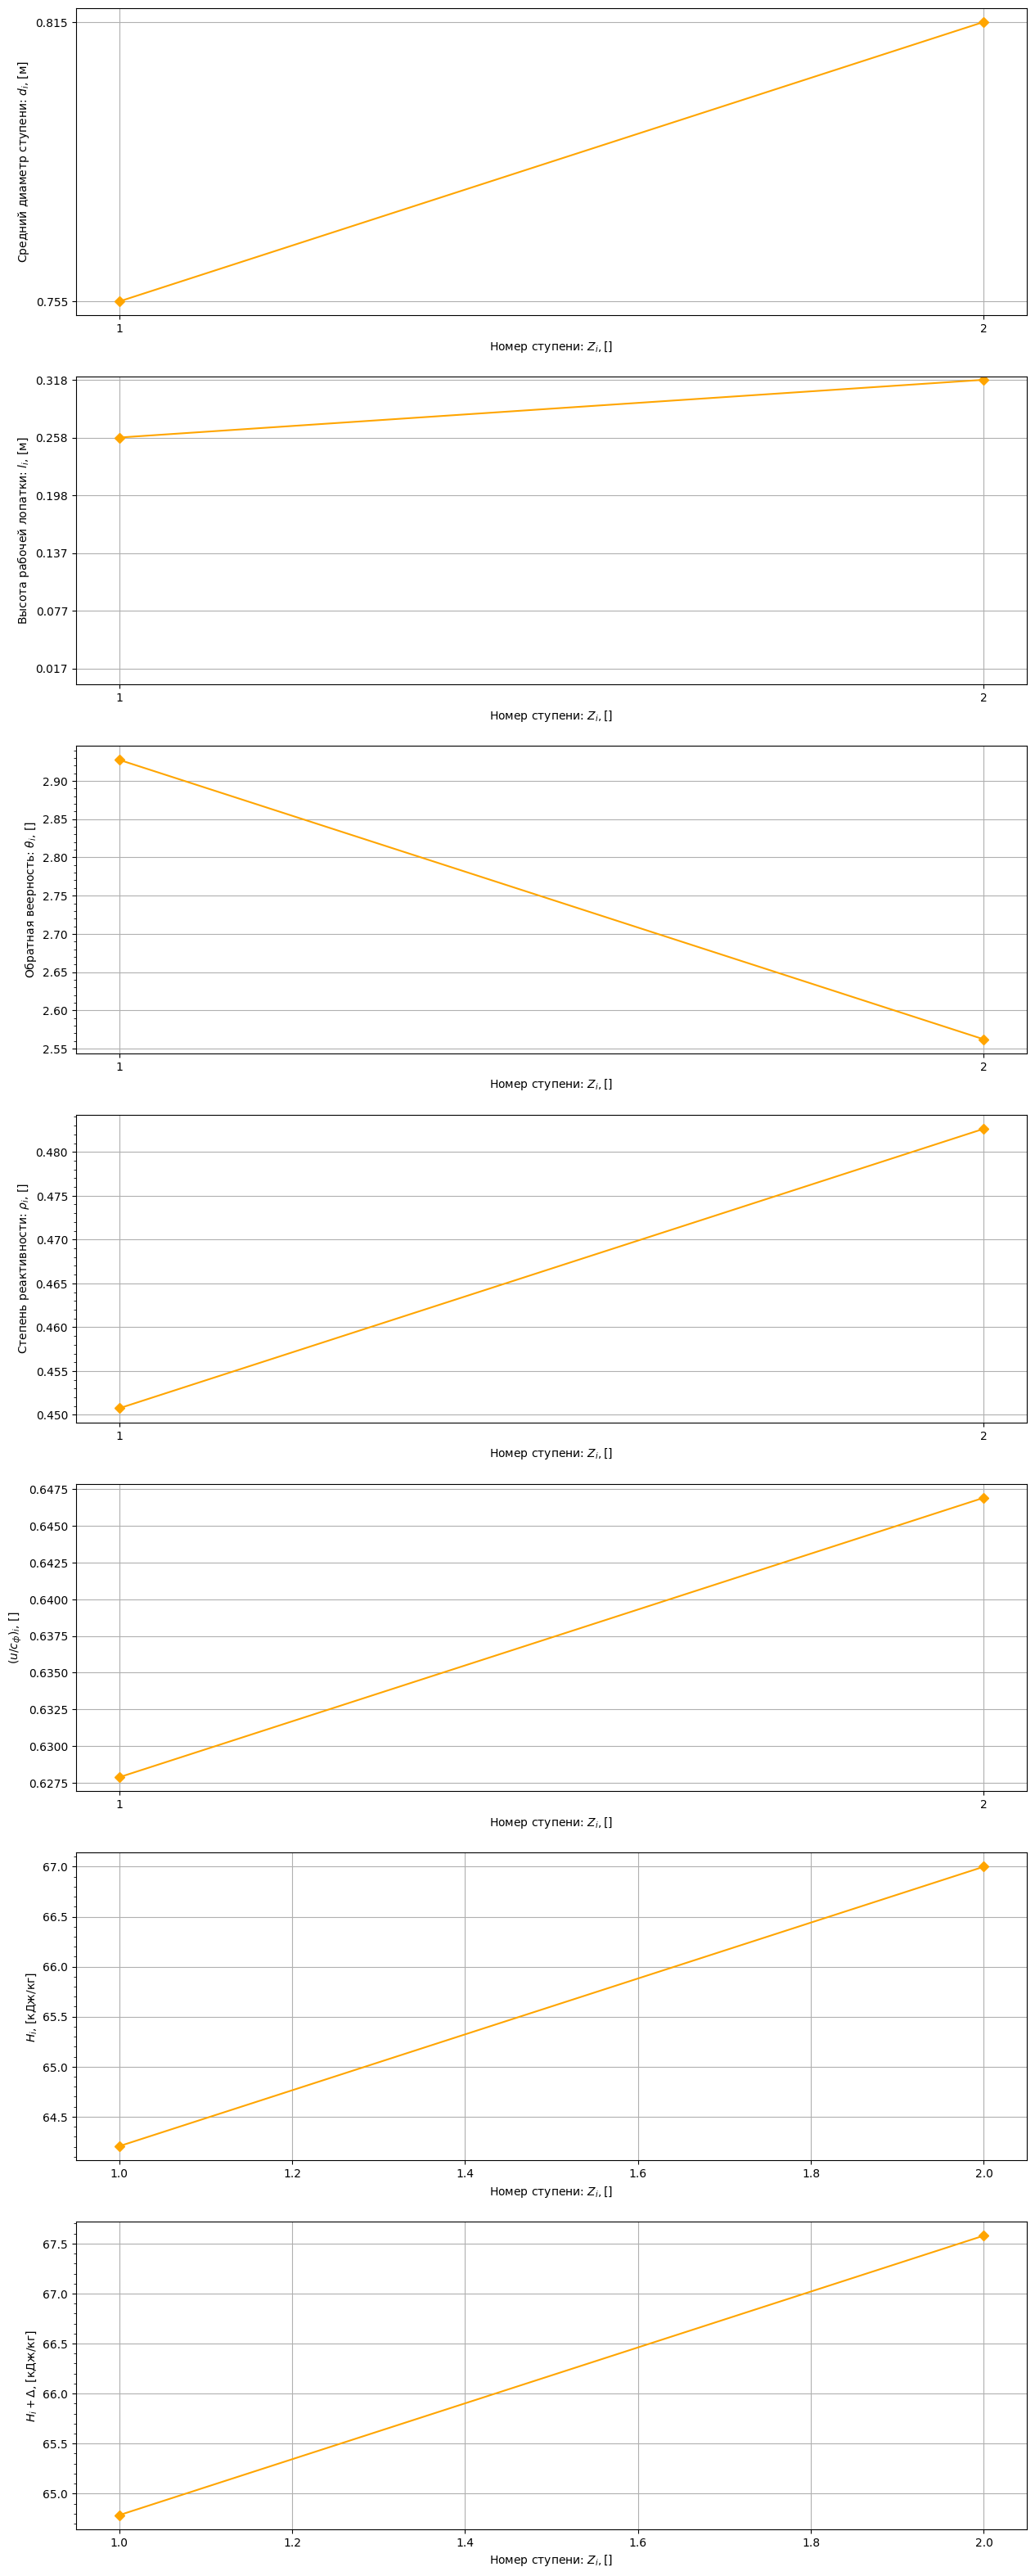

In [37]:
def get_index_offset_value(in_vec):
    delta = (in_vec[1] - in_vec[0]).m
    offset_start = in_vec[0].m
    offset_it = 0

    while(offset_start > 0):
        offset_start -= delta
        offset_it += 1
    offset_start += delta
    return [delta, -offset_it*delta]
    
# Графики    
fig,axs = plt.subplots(figsize=(15,40),nrows=7, ncols=1)

# Для зависимости диаметров
axs[0].plot(stages_number_vec, d_vec.m, **{'marker': 'D'}, color='orange')
axs[0].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[0].set_ylabel("Средний диаметр ступени: $d_{i}$, [м]", **{'fontname':'sans-serif'})
#axs[0].set_ylim([0,None])
#axs[0].text(1.5,0.837, 'Общее количество ступеней: $Z={}$'.format(Z), **{'fontname':'DejaVu Sans'})
plot_delta_d, plot_offset_d = get_index_offset_value(d_vec)
axs[0].yaxis.set_major_locator(ticker.IndexLocator(base=plot_delta_d, offset= 0))
axs[0].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[0].grid(True)

# # Для зависимости высот лопаток
axs[1].plot(stages_number_vec, l_vec, **{'marker': 'D'}, color='orange')
axs[1].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[1].set_ylabel('Высота рабочей лопатки: $l_{i}$, [м]', **{'fontname':'sans-serif'})
axs[1].set_ylim([0,None])
# plot_delta_l = l_vec[1] - l_vec[0]
# #plot_delta_l = l_fun_handler.get_no_dim(2) - l_fun_handler.get_no_dim(1)
# offset_l = l_vec[0].m
# offset_it = 0
# while(offset_l > 0):
#     offset_l -= plot_delta_l.m
#     offset_it += 1
# offset_l +=plot_delta_l.m

plot_delta_l, plot_offset_l = get_index_offset_value(l_vec)
axs[1].yaxis.set_major_locator(ticker.IndexLocator(base=plot_delta_l, offset=plot_offset_l))
#axs[1].yaxis.set_major_locator(ticker.LinearLocator())
axs[1].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[1].grid(True)

# Для обратной веерности
axs[2].plot(stages_number_vec, theta_vec, **{'marker': 'D'}, color='orange')
axs[2].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[2].set_ylabel('Обратная веерность: $\\theta_{i}$, []', **{'fontname':'sans-serif'})
axs[2].yaxis.set_minor_locator(ticker.MultipleLocator(5))
axs[2].minorticks_on()
axs[2].xaxis.set_minor_locator(plt.NullLocator())
axs[2].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[2].grid(True)

# Для степени реактивности
axs[3].plot(stages_number_vec, rho_vec, **{'marker': 'D'}, color='orange')
axs[3].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[3].set_ylabel('Степень реактивности: $\\rho_{i}$, []', **{'fontname':'sans-serif'})
axs[3].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plot_delta_rho = rho_vec[1] - rho_vec[0]
axs[3].yaxis.set_minor_locator(ticker.MultipleLocator(5))
axs[3].minorticks_on()
axs[3].xaxis.set_minor_locator(plt.NullLocator())
axs[3].grid(True)

# Для отношения U/c_f
axs[4].plot(stages_number_vec, uDIVc_f_vec, **{'marker': 'D'}, color='orange')
axs[4].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[4].set_ylabel('$(u/c_{ф})_{i}$, []', **{'fontname':'sans-serif'})
axs[4].minorticks_on()
axs[4].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[4].yaxis.set_minor_locator(ticker.MultipleLocator(5))
axs[4].xaxis.set_minor_locator(plt.NullLocator())
axs[4].grid(True)

# Для теплоперепадов
axs[5].plot(stages_number_vec, H_vec, **{'marker': 'D'}, color='orange')
axs[5].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[5].set_ylabel('$H_i$, [кДж/кг]', **{'fontname':'sans-serif'})
#axs[5].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
axs[5].minorticks_on()
axs[5].xaxis.set_minor_locator(plt.NullLocator())

#axs[5].yaxis.set_minor_locator(ticker.MultipleLocator(Z.m + 2))

axs[5].grid(True)

# Для теплоперепадов с учетом невязки
axs[6].plot(stages_number_vec, H_new_vec, **{'marker': 'D'}, color='orange')
axs[6].set_xlabel('Номер ступени: $Z_{i}, []$')
axs[6].set_ylabel('$H_{i} + \\Delta$, [кДж/кг]', **{'fontname':'sans-serif'})
axs[6].minorticks_on()
#axs[6].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
#axs[6].yaxis.set_minor_locator(ticker.MultipleLocator(Z.m + 2))
axs[6].xaxis.set_minor_locator(plt.NullLocator())


axs[6].grid(True)